In [35]:
import pandas as pd
import matplotlib
from sklearn.metrics import mean_absolute_error
#from sklearn.tree import DecisionTreeRegressor
#model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# imputing missing values
from sklearn.impute import SimpleImputer
#encoding categorical variables.
from sklearn.preprocessing import OneHotEncoder
#Spliting the data into test and validation.
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv(r'C:\Users\HP\Documents\ML Projects\home-data-for-ml-course\train.csv')
test = pd.read_csv(r'C:\Users\HP\Documents\ML Projects\home-data-for-ml-course\test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
y= train.SalePrice
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

<AxesSubplot:>

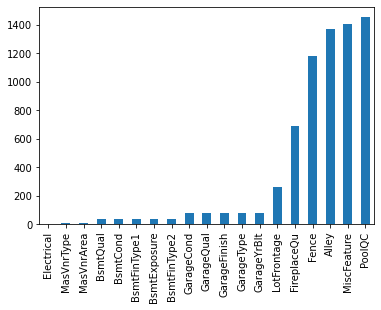

In [8]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [9]:
missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

So there are 19 columns in total with missing values, 5 of which have more than 50% missing data.<br>
So for the sake of simplicity, Still we have 14 variables with null values.
* We are droping ID column as it has no realationship with SalesPrice.
* Also lets drop SalePrice column from train dataset as we have already transfered the values to y.

In [10]:
#Droping columns with >50% missing values.
train = train.drop(columns=['PoolQC', 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu','Id','SalePrice'])
test = test.drop(columns=['PoolQC', 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu','Id'])

In [11]:
train.shape

(1460, 74)

In [12]:
test.shape

(1459, 74)

Great! so now we have exact same columns in both the datasets. Now lets impute the rest of missing values.
* Important thing to note here, we have to use 'most_frequent' as a strategy in order to deal with categorical data.

In [15]:
# Fill in the lines below: imputation
my_imputer = SimpleImputer(strategy='most_frequent')
#impute the mean values
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train))
imputed_X_test = pd.DataFrame(my_imputer.transform(test))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = train.columns
imputed_X_test.columns = test.columns

In [18]:
#Often we find irregularities with test dataset as well, this becomes a problem as model needs values in order to predict 
#target values.
missing = imputed_X_train.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

both the datasets do not have missing values. lets convert the categorical values to numerical values with one-hot encoder.

In [22]:
train.dtypes.value_counts()

object     38
int64      33
float64     3
dtype: int64

In [23]:
object_cols = list(train.select_dtypes('object'))

In [27]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(imputed_X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(imputed_X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train.index
OH_cols_test.index = test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = imputed_X_train.drop(object_cols, axis=1)
num_X_test = imputed_X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [30]:
OH_X_test.shape

(1459, 270)

In [31]:
OH_X_train.shape

(1460, 270)

After the data is prepared, i.e missing values are taken care of and categorical values are converted into numerical values, its time for us to split the data so that we can use multiple models to check which one performs the best.

In [33]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(OH_X_train, y, train_size=0.8, test_size=0.2, random_state=0)

#### Model no. 1 - Decision tree regressor

In [36]:
# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=1)

In [37]:
# Fit model
model.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeRegressor(random_state=1)

In [38]:
#Predict and calculate mean absolute error.

dtr_predictions = model.predict(X_valid)
print(mean_absolute_error(y_valid, dtr_predictions))

26982.318493150684


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


#### Model no. 2 - Random forest regressor

In [39]:
model = RandomForestRegressor(random_state=0)

In [40]:
model.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(random_state=0)

In [41]:
rfr_predictions = model.predict(X_valid)
print(mean_absolute_error(y_valid, rfr_predictions))

17689.817671232875


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Lets keep it short, out of the 2 models, we have got better result with Random tree regressor therefore, lets predict the value for test dataset and submit it on Kaggle.

In [42]:
#get test predictions
preds_test = model.predict(OH_X_test)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
preds_test

array([126927.5 , 153263.5 , 183832.67, ..., 151195.99, 113086.75,
       225682.37])

In [47]:
# Save test predictions to file
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': preds_test})
output.to_csv(r'C:\Users\HP\Documents\ML Projects\home-data-for-ml-course\submission.csv', index=False)

Just wanted to check the impact on result if we use the whole train data without any validation.

In [48]:
model.fit(OH_X_train, y)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(random_state=0)

In [49]:
#get test predictions
preds_test1 = model.predict(OH_X_test)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [50]:
# Save test predictions to file
output1 = pd.DataFrame({'Id': test.index,
                       'SalePrice': preds_test})
output1.to_csv(r'C:\Users\HP\Documents\ML Projects\home-data-for-ml-course\submission1.csv', index=False)

### So there was no difference in score even though we considered the whole training dataset.
good learning nonetheless.